Les exercices 1 à 3 sont indépendants des données “santé mentale en prison” (smp) et reposent sur la compréhension et l'utilisation du logiciel R à partir de données artificielles. Les exercices 4 à 6 portent sur les données smp, disponibles dans un data frame (ou tableau de données) enregistré de la manière suivante :

      smp <- read.csv2("smp2.csv")
    
Le fichier smp2.csv peut être téléchargé à partir du menu «Ressources pédagoqiques» depuis la page principale du cours. Le descriptif des variables contenues dans ce fichier de données est fourni sur la même page.

L'ensemble des variables est donc accessible à partir du data frame nommé smp. Pour accéder à une variable, par exemple l’âge, il sera donc nécessaire de préfixer le nom de la variable avec le nom de ce data frame, par exemple smp$age.

##### 1. Après avoir construit un tableau de contingence croisant les modalités de deux variables qualitatives, nous souhaitons afficher les fréquences relatives rapportées aux totaux lignes (somme des effectifs par ligne). Quelle option doit valoir margin= de la commande prop.table() ?

In [1]:
data <- read.csv2('../data//smp2.csv')

In [3]:
str(data)

'data.frame':	799 obs. of  26 variables:
 $ age         : int  31 49 50 47 23 34 24 52 42 45 ...
 $ prof        : Factor w/ 8 levels "agriculteur",..: 3 NA 7 6 8 6 3 2 6 6 ...
 $ duree       : int  4 NA 5 NA 4 NA NA 5 4 NA ...
 $ discip      : int  0 0 0 0 1 0 0 0 1 0 ...
 $ n.enfant    : int  2 7 2 0 1 3 5 2 1 2 ...
 $ n.fratrie   : int  4 3 2 6 6 2 3 9 12 5 ...
 $ ecole       : int  1 2 2 1 1 2 1 2 1 2 ...
 $ separation  : int  0 1 0 1 1 0 1 0 1 0 ...
 $ juge.enfant : int  0 0 0 0 NA 0 1 0 1 0 ...
 $ place       : int  0 0 0 1 1 0 1 0 0 0 ...
 $ abus        : int  0 0 0 0 0 0 0 0 1 1 ...
 $ grav.cons   : int  1 2 2 1 2 1 5 1 5 5 ...
 $ dep.cons    : int  0 0 0 0 1 0 1 0 1 0 ...
 $ ago.cons    : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ptsd.cons   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alc.cons    : int  0 0 0 0 0 0 0 0 1 1 ...
 $ subst.cons  : int  0 0 0 0 0 0 1 0 1 0 ...
 $ scz.cons    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ char        : int  1 1 1 1 1 1 1 1 4 1 ...
 $ rs          : int  2 2 2 2 2 1 3

In [6]:
prop.table(table(data$prof, data$rs), margin=1)

                    
                             1         2         3
  agriculteur        0.6000000 0.2000000 0.2000000
  artisan            0.4266667 0.3333333 0.2400000
  autre              0.2962963 0.2222222 0.4814815
  cadre              0.6000000 0.0500000 0.3500000
  employe            0.3451327 0.2477876 0.4070796
  ouvrier            0.3826531 0.2295918 0.3877551
  prof.intermediaire 0.4081633 0.3265306 0.2653061
  sans emploi        0.2836538 0.1634615 0.5528846

In [7]:
prop.table(table(data$prof, data$rs)) # no argument means over TOTAL/TOTAL

                    
                               1           2           3
  agriculteur        0.004329004 0.001443001 0.001443001
  artisan            0.046176046 0.036075036 0.025974026
  autre              0.011544012 0.008658009 0.018759019
  cadre              0.017316017 0.001443001 0.010101010
  employe            0.056277056 0.040404040 0.066378066
  ouvrier            0.108225108 0.064935065 0.109668110
  prof.intermediaire 0.028860029 0.023088023 0.018759019
  sans emploi        0.085137085 0.049062049 0.165945166

###### 2. Supposons que nous disposons d'une variable numérique x (incluant des données manquantes) et d'une variable qualitative z, stockées dans un data frame appelé d. Quelle commande permet de calculer la moyenne de x pour chaque niveau de z ?

In [22]:
d <- data[c('age', 'prof')] # subset using a vector

In [21]:
head(d)

age,prof
31,autre
49,NA
50,prof.intermediaire
47,ouvrier
23,sans emploi
34,ouvrier


In [34]:
by(d$age, d$prof, mean, na.rm=TRUE)

d$prof: agriculteur
[1] 48.83333
------------------------------------------------------------ 
d$prof: artisan
[1] 45.11111
------------------------------------------------------------ 
d$prof: autre
[1] 34.93548
------------------------------------------------------------ 
d$prof: cadre
[1] 50.08333
------------------------------------------------------------ 
d$prof: employe
[1] 38.71111
------------------------------------------------------------ 
d$prof: ouvrier
[1] 37.39648
------------------------------------------------------------ 
d$prof: prof.intermediaire
[1] 43.25862
------------------------------------------------------------ 
d$prof: sans emploi
[1] 35.8964

In [35]:
aggregate(age~prof, data=d, mean)

prof,age
agriculteur,48.83333
artisan,45.11111
autre,34.93548
cadre,50.08333
employe,38.71111
ouvrier,37.39648
prof.intermediaire,43.25862
sans emploi,35.89640


In [46]:
aggregate(age, prof, data=d, mean, na.rm=TRUE)

ERROR: Error in aggregate(age, prof, data = d, mean, na.rm = TRUE): objet 'age' introuvable


In [51]:
#within(d, tapply(age, prof, mean, na.rm=TRUE))

###### 3. La commande t.test(y ~ z, data=d) où y et z sont deux variables (numérique et qualitative) disponibles dans un data frame d fournit un test de Student supposant l'égalité des variances parentes.



In [36]:
t.test(age~prof, data=d)

ERROR: Error in t.test.formula(age ~ prof, data = d): grouping factor must have exactly 2 levels


###### 4. Dans le data frame smp, la durée d'interview médiane chez les personnes diagnostiquées comme dépressives (dep.cons = 1) est supérieure à celle des personnes diagnostiquées comme non-dépressives (dep.cons = 0) de plus de :

In [38]:
by(data$dur.interv, data$dep.cons, median, na.rm=TRUE)

data$dep.cons: 0
[1] 60
------------------------------------------------------------ 
data$dep.cons: 1
[1] 65

###### 5. Donner la borne inférieure d'un intervalle de confiance à 95 % pour la corrélation linéaire (Pearson) entre les variables durée d'interview (dur.interv) et âge (age) (3 chiffres après la virgule).

In [40]:
cor(data$dur.interv, data$age, use='complete.obs')

[1] 0.08573358

In [41]:
cor.test(data$dur.interv, data$age)


	Pearson's product-moment correlation

data:  data$dur.interv and data$age
t = 2.3487, df = 745, p-value = 0.0191
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01408787 0.15650345
sample estimates:
       cor 
0.08573358 


In [52]:
cor.test(~dur.interv+age, data=data)


	Pearson's product-moment correlation

data:  dur.interv and age
t = 2.3487, df = 745, p-value = 0.0191
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01408787 0.15650345
sample estimates:
       cor 
0.08573358 


###### 6. Nous souhaitons vérifier si la durée d'interview (dur.interv) diffère sensiblement selon que les individus ont déjà effectué une tentative de suicide dans le passé ou non (suicide.past) à l'aide d'un test de Wilcoxon. Le degré de significativité du test est :

In [42]:
wilcox.test(data$dur.interv, data$suicide.past)


	Wilcoxon rank sum test with continuity correction

data:  data$dur.interv and data$suicide.past
W = 587460, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [54]:
wilcox.test(dur.interv ~ suicide.past, data = data)$p.value

[1] 1.355026e-07

###### 1. La commande tapply() admet 3 arguments principaux. À quoi correspond le 2ème argument ?

In [55]:
#  Le facteur de classification

###### 2.Pour afficher sous forme d'un diagramme de type boîtes à moustaches, la distribution d'une variable x en fonction des niveaux d'un facteur z, toutes les deux stockées dans un data frame d, nous utilisons la commande :

In [65]:
options(repr.plot.width=6, repr.plot.height=3)

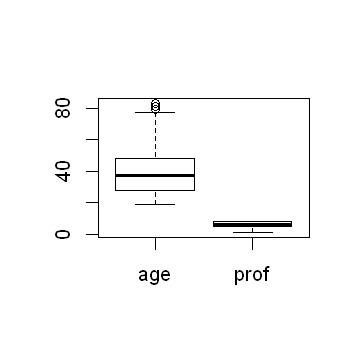

In [62]:
boxplot(data[, c('age', 'prof')])

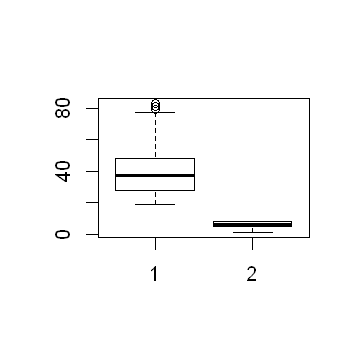

In [63]:
boxplot(data$age, data$prof)

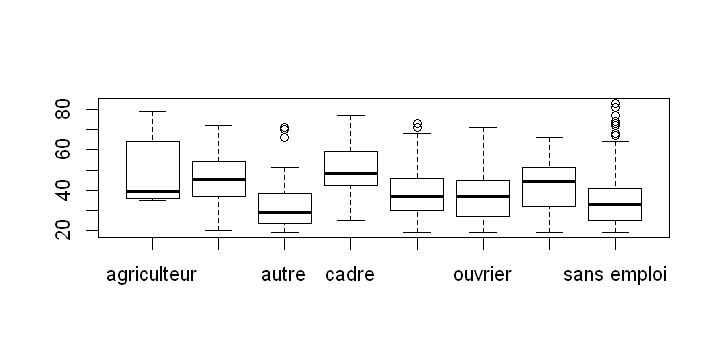

In [66]:
boxplot(age~prof, data=data)

##### 3. Quelle est la valeur de la statistique de test (c’est-à-dire la valeur du « t », que l'on donnera pour simplifier en valeur absolue) pour un test de Student comparant les durées moyennes d'intervention (dur.interv) selon le diagnostic de dépression (dep.cons). Nous supposerons l'égalité des variances dans les deux groupes (3 chiffres après la virgule).

In [71]:
t.test(data$dur.interv ~ data$dep.cons, var.equal = TRUE)


	Two Sample t-test

data:  data$dur.interv by data$dep.cons
t = -5.2583, df = 747, p-value = 1.9e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.457001  -4.771515
sample estimates:
mean in group 0 mean in group 1 
       58.92341        66.53767 


In [72]:
t.test(dur.interv ~ dep.cons, data=data, var.equal = TRUE)


	Two Sample t-test

data:  dur.interv by dep.cons
t = -5.2583, df = 747, p-value = 1.9e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.457001  -4.771515
sample estimates:
mean in group 0 mean in group 1 
       58.92341        66.53767 


###### 4. Quelle commande permet d'obtenir l'odds-ratio permettant de tester le degré d'association entre les deux variable binaires dep.cons et suicide.past ?

In [76]:
help(odds.test)

In [77]:
fisher.test(data$dep.cons, data$rs)


	Fisher's Exact Test for Count Data

data:  data$dep.cons and data$rs
p-value = 0.007047
alternative hypothesis: two.sided
